Nomi colonne nel dataset: ['Comune', 'ATO', 'Abitanti', 'Kg di rifiuti differenziati (RDi)', 'Kg di rifiuti non differenziati (RUind)', 'Totale Kg di rifiuti prodotti (RDi+RUind)', 'Anno']
Nomi colonne puliti: ['comune', 'ato', 'abitanti', 'kg di rifiuti differenziati (rdi)', 'kg di rifiuti non differenziati (ruind)', 'totale kg di rifiuti prodotti (rdi+ruind)', 'anno']
Valori massimi:
 kg di rifiuti differenziati (rdi)            838.290
kg di rifiuti non differenziati (ruind)      528.020
totale kg di rifiuti prodotti (rdi+ruind)    995.553
dtype: float64
MAE: 21.413384698165924
MSE: 2317.9443082193275
RMSE: 48.1450340971873
R²: 0.9557873171788108
                                         Coefficiente
kg di rifiuti differenziati (rdi)           172.23033
kg di rifiuti non differenziati (ruind)     100.66051


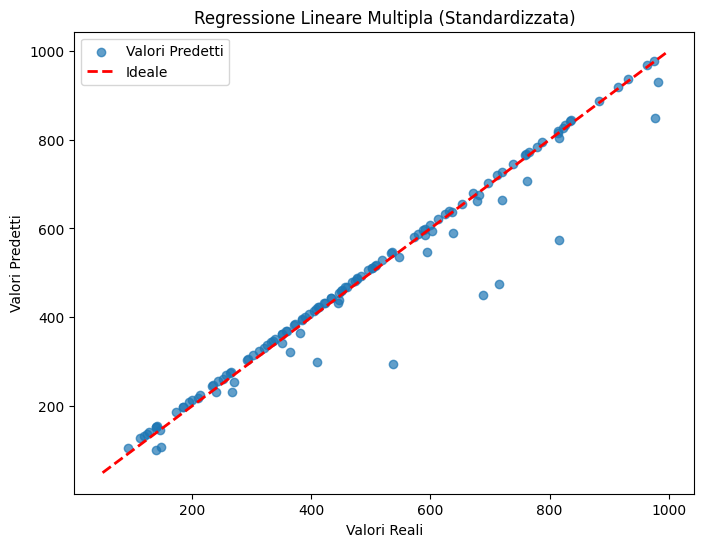

              comune       ato  abitanti  kg di rifiuti differenziati (rdi)  \
2           Andretta  Avellino    1658.0                             313201   
3          Aquilonia  Avellino    1493.0                             283255   
11            Bonito  Avellino    2212.0                             357667   
13           Candida  Avellino    1085.0                             214955   
14  Capriglia Irpina  Avellino    2241.0                             235868   

    kg di rifiuti non differenziati (ruind)  \
2                                     16228   
3                                     29616   
11                                    27198   
13                                    13646   
14                                    39102   

    totale kg di rifiuti prodotti (rdi+ruind)  anno      y_pred  
2                                      475481  2021  485.334082  
3                                      579415  2021  587.132803  
11                                     63649

/var/folders/wx/cjq88z7504q_k9nntm5lzsmm0000gn/T/ipykernel_83873/2667867122.py:130: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_pred = df.groupby(col_comune, group_keys=False).apply(predict_2024).reset_index()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Caricare il dataset con rilevamento automatico del separatore
df = pd.read_csv("dataset/dataset_filtrato.csv", sep=None, engine='python')

# Stampiamo i nomi delle colonne per verificare che siano corretti
print("Nomi colonne nel dataset:", df.columns.tolist())

# Rimuoviamo spazi extra e standardizziamo i nomi delle colonne
df.columns = df.columns.str.strip().str.lower()

# Stampiamo i nuovi nomi delle colonne
print("Nomi colonne puliti:", df.columns.tolist())

# Selezioniamo le colonne numeriche corrette
cols_to_convert = [
    'kg di rifiuti differenziati (rdi)',
    'kg di rifiuti non differenziati (ruind)',
    'totale kg di rifiuti prodotti (rdi+ruind)'
]

# Normalizziamo i nomi delle colonne per sicurezza
cols_to_convert = [col.strip().lower() for col in cols_to_convert]

# Pulizia dei dati (rimozione caratteri non numerici e conversione)
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(r'[^\d.,]', '', regex=True).str.replace(',', '.')

# Conversione in numerico
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Rimuoviamo righe con valori NaN dopo la conversione
df = df.dropna()

# Controlliamo se ci sono outlier evidenti
print("Valori massimi:\n", df[cols_to_convert].max())

# Definiamo le variabili indipendenti (X) e la variabile dipendente (y)
X = df[['kg di rifiuti differenziati (rdi)', 'kg di rifiuti non differenziati (ruind)']]
y = df['totale kg di rifiuti prodotti (rdi+ruind)']

# Standardizzazione delle feature (Z-score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Suddivisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Creazione e addestramento del modello
model = LinearRegression()
model.fit(X_train, y_train)

# Predizioni per il test set
y_pred_test = model.predict(X_test)

# Predizioni su tutto il dataset
df['y_pred'] = model.predict(X_scaled)

# Calcolare le metriche di valutazione
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

# Stampare i risultati
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Coefficienti del modello
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficiente'])
print(coefficients)

# Grafico migliorato
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, label="Valori Predetti")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label="Ideale")
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Regressione Lineare Multipla (Standardizzata)")
plt.legend()
plt.show()

# Salva il dataset con le predizioni
df.to_csv("dataset/dataset_predizioni.csv", index=False)

# Identificare le colonne chiave
col_anno = 'anno'
col_comune = 'comune'
col_x1 = 'kg di rifiuti differenziati (rdi)'
col_x2 = 'kg di rifiuti non differenziati (ruind)'
col_target = 'totale kg di rifiuti prodotti (rdi+ruind)'

# Funzione per convertire stringhe in numeri gestendo errori
def convert_to_float(series):
    return pd.to_numeric(series.astype(str)
                         .str.replace('.', '', regex=False)
                         .str.replace(',', '.', regex=False)
                         .str.strip(), errors='coerce')  # Sostituisce errori con NaN

# Convertiamo le colonne numeriche
df[col_x1] = convert_to_float(df[col_x1])
df[col_x2] = convert_to_float(df[col_x2])
df[col_target] = convert_to_float(df[col_target])

# Rimuoviamo eventuali righe con valori NaN dopo la conversione
df.dropna(subset=[col_x1, col_x2, col_target], inplace=True)

def predict_2024(group):
    if len(group) < 2:
        return group[col_target].iloc[-1] if len(group) == 1 else np.nan  # Usa l'ultimo valore se disponibile
    
    model = LinearRegression()
    X = group[[col_x1, col_x2]].values  # Assicura che sia un array numpy
    y = group[col_target]
    model.fit(X, y)
    
    X_pred = group[[col_x1, col_x2]].iloc[-1:].values  # Ultima riga in formato array numpy
    return model.predict(X_pred)[0]

# Applicare il modello per ogni comune
df_pred = df.groupby(col_comune, group_keys=False).apply(predict_2024).reset_index()
df_pred.columns = [col_comune, 'predizione_2024']

# Riporta i numeri nel formato originale con il punto come separatore delle migliaia e la virgola per i decimali
df_pred['predizione_2024'] = df_pred['predizione_2024'].apply(lambda x: f"{x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

# Salvare il dataset con le predizioni
df_pred.to_csv("dataset/predizioni_2024.csv", index=False)

print(df_pred.head())
